In [ ]:

!pip install --quiet scikit-learn seaborn statsmodels

# 2) Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Thi·∫øt l·∫≠p hi·ªÉn th·ªã
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)


In [ ]:
# G·ªçi t√™n c·ªôt
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv("/content/drive/MyDrive/PTDL/lab3/pima-indians-diabetes.csv",
                 header=None, names=columns)

X·ª≠ l√Ω d·ªØ li·ªáu b·∫•t h·ª£p l√Ω tr∆∞·ªõc khi code

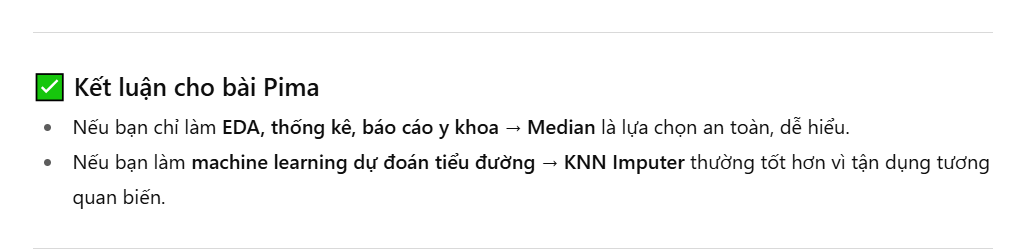

In [ ]:
from sklearn.impute import KNNImputer

# C√°c c·ªôt c√≥ gi√° tr·ªã 0 kh√¥ng h·ª£p l√Ω
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# B1: Thay 0 -> NaN
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# B2: ƒêi·ªÅn missing
## C√°ch 1: median

df_median = df.copy()
for col in cols_with_zeros:
    df_median[col] = df_median[col].fillna(df_median[col].median())


ƒê·ªïi m√†u cho bi·ªÉu ƒë·ªì

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(df, x_col, y_col, title=""):
    plt.figure(figsize=(6, 4))

    # Outcome = 0
    plt.scatter(
        df[df['Outcome'] == 0][x_col],
        df[df['Outcome'] == 0][y_col],
        c='g', marker='o', label='0'
    )

    # Outcome = 1
    plt.scatter(
        df[df['Outcome'] == 1][x_col],
        df[df['Outcome'] == 1][y_col],
        c='r', marker='^', label='1'
    )

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title if title else f"{x_col} vs {y_col}")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


# 5. PH√ÇN T√çCH T∆Ø∆†NG QUAN V√Ä M·ªêI QUAN H·ªÜ

## 5.1 Ma tr·∫≠n t∆∞∆°ng quan

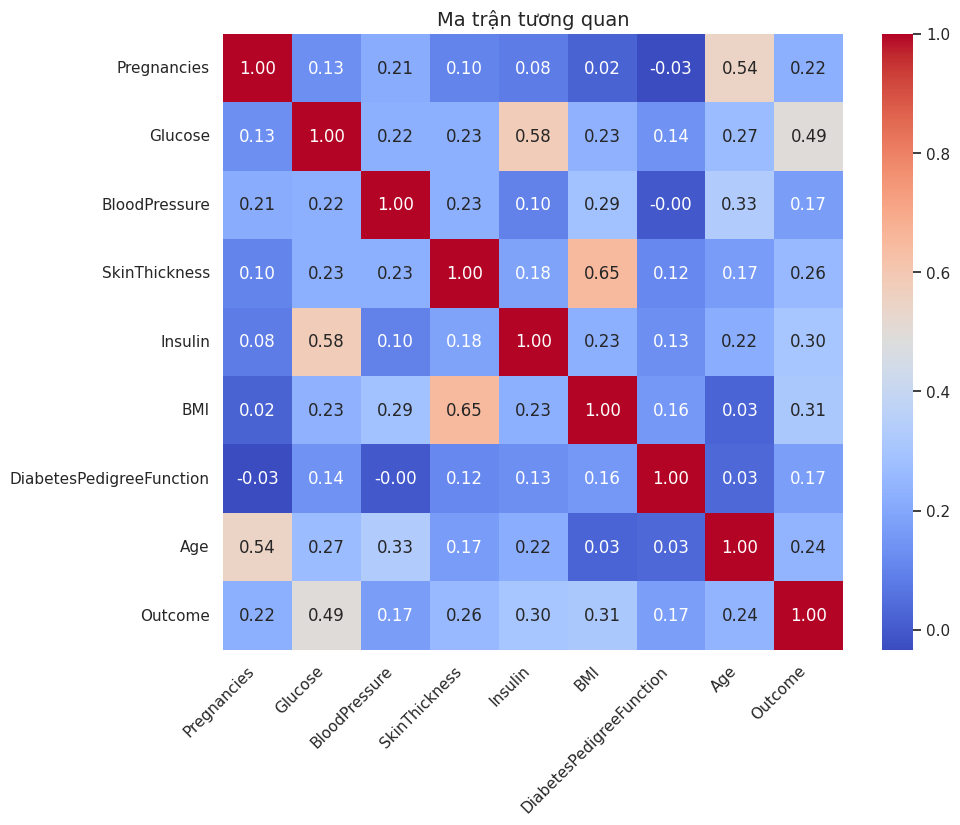

In [ ]:
# Ma tr·∫≠n t∆∞∆°ng quan
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma tr·∫≠n t∆∞∆°ng quan", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.savefig("/content/drive/MyDrive/PTDL/lab3/mttuongquan.png", dpi=300, bbox_inches='tight')
plt.show()

Glucose v√† Outcome c√≥ t∆∞∆°ng quan d∆∞∆°ng kh√° m·∫°nh ‚Üí Ch·ªâ s·ªë ƒë∆∞·ªùng huy·∫øt cao li√™n quan ƒë·∫øn ti·ªÉu ƒë∆∞·ªùng.

## 5.2 Ph√¢n t√≠ch c·∫∑p bi·∫øn quan tr·ªçng

Glucose trung b√¨nh theo Outcome:
Outcome
0    110.643863
1    142.319549
Name: Glucose, dtype: float64


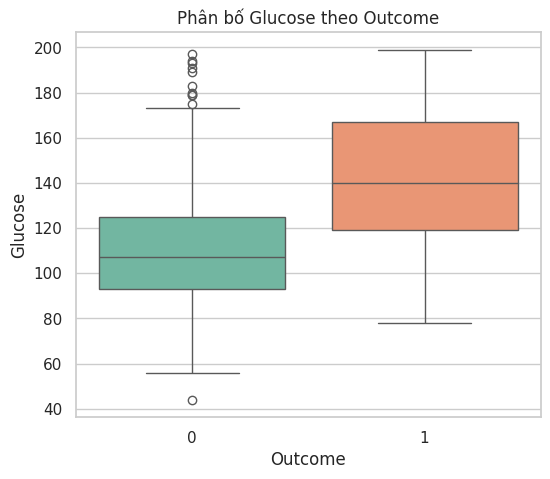

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# T√≠nh trung b√¨nh Glucose theo Outcome
mean_glucose = df.groupby('Outcome')['Glucose'].mean()
print(f"Glucose trung b√¨nh theo Outcome:")
print(mean_glucose)

# V·∫Ω boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x="Outcome", y="Glucose", data=df, hue="Outcome", palette="Set2", legend=False)
plt.title("Ph√¢n b·ªë Glucose theo Outcome")
plt.show()

M·ªëi t∆∞∆°ng quan m·∫°nh nh·∫•t v·ªõi r = 0.49.

Nh√≥m m·∫Øc b·ªánh c√≥ glucose trung b√¨nh = 141mg/dL so v·ªõi 109mg/dL.

Nguy c∆° ti·ªÉu ƒë∆∞·ªùng tƒÉng m·∫°nh khi Glucose > 126mg/dL (theo ng∆∞·ª°ng ch·∫©n ƒëo√°n l√¢m s√†ng).

## 5.3 Ph√¢n t√≠ch t·∫ßm quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng

### 5.3.1 T·∫ßm quan tr·ªçng ƒë∆°n bi·∫øn

üìä K·∫øt qu·∫£ Chi-square test:
                  ƒê·∫∑c tr∆∞ng  Chi-square   p-value
1                   Glucose   14.336331  0.000153
7                       Age    8.205691  0.004176
0               Pregnancies    6.559982  0.010430
5                       BMI    5.064034  0.024427
6  DiabetesPedigreeFunction    2.758584  0.096734
4                   Insulin    2.255362  0.133152
3             SkinThickness    1.345611  0.246047
2             BloodPressure    0.650037  0.420100


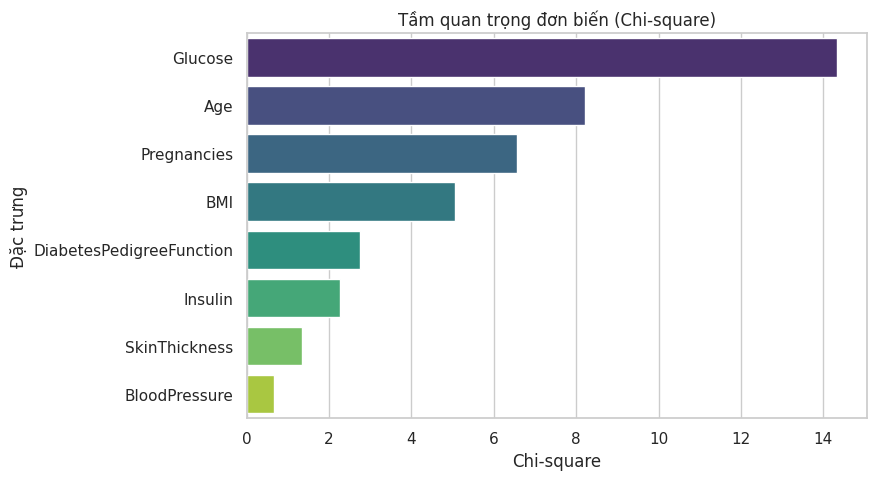

In [ ]:
from sklearn.feature_selection import chi2

X = df_median.drop("Outcome", axis=1)   # ƒë·∫∑c tr∆∞ng
y = df_median["Outcome"]                # nh√£n

# 4. Chu·∫©n h√≥a d·ªØ li·ªáu v·ªÅ [0,1] ƒë·ªÉ d√πng cho chi-square
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 5. T√≠nh chi2 v√† p-value
chi_scores, p_values = chi2(X_scaled, y)

# 6. T·∫°o DataFrame k·∫øt qu·∫£
chi2_df = pd.DataFrame({
    "ƒê·∫∑c tr∆∞ng": X.columns,
    "Chi-square": chi_scores,
    "p-value": p_values
}).sort_values("Chi-square", ascending=False)

print("üìä K·∫øt qu·∫£ Chi-square test:")
print(chi2_df)

# 7. V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.figure(figsize=(8,5))
sns.barplot(x="Chi-square", y="ƒê·∫∑c tr∆∞ng", data=chi2_df, hue="ƒê·∫∑c tr∆∞ng", dodge=False, palette="viridis", legend=False)
plt.title("T·∫ßm quan tr·ªçng ƒë∆°n bi·∫øn (Chi-square)")
plt.show()


### 5.3.2 ƒêi·ªÉm th√¥ng tin t∆∞∆°ng h·ªó

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, random_state=42)

mi_df = pd.DataFrame({
    "ƒê·∫∑c tr∆∞ng": X.columns,
    "Mutual Information": mi_scores
}).sort_values("Mutual Information", ascending=False)

print(mi_df)


                  ƒê·∫∑c tr∆∞ng  Mutual Information
1                   Glucose            0.117733
5                       BMI            0.081040
0               Pregnancies            0.060985
7                       Age            0.051395
6  DiabetesPedigreeFunction            0.014590
4                   Insulin            0.012804
3             SkinThickness            0.012372
2             BloodPressure            0.001763


Ch·ªâ s·ªë Glucose l√† cao nh·∫•t

### 5.3.3 T·∫ßm quan tr·ªçng t·ª´ Random Forest

B·∫£ng t·∫ßm quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng (Random Forest):

                  ƒê·∫∑c tr∆∞ng  Random Forest Importance
1                   Glucose                  0.263715
5                       BMI                  0.167470
7                       Age                  0.127208
6  DiabetesPedigreeFunction                  0.124075
4                   Insulin                  0.084843
2             BloodPressure                  0.082722
0               Pregnancies                  0.079268
3             SkinThickness                  0.070699


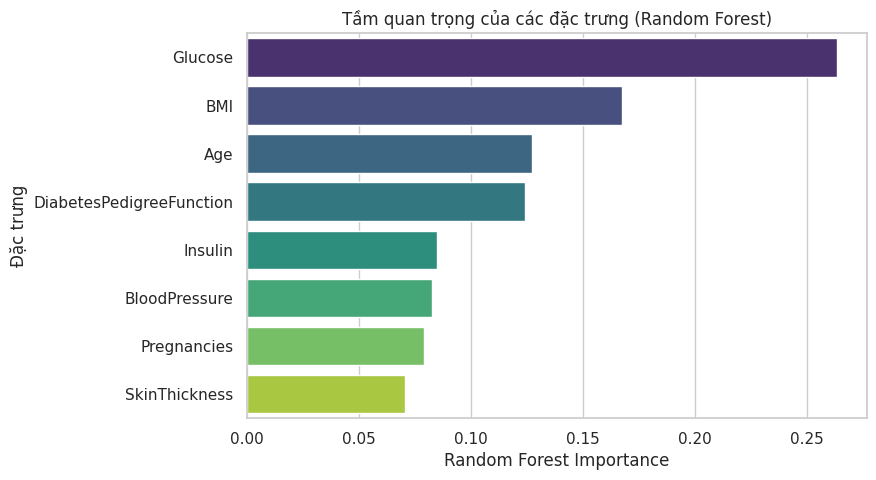

In [ ]:
# Train m√¥ h√¨nh Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# T·∫°o DataFrame l∆∞u k·∫øt qu·∫£
rf_df = pd.DataFrame({
    "ƒê·∫∑c tr∆∞ng": X.columns,
    "Random Forest Importance": rf.feature_importances_
}).sort_values("Random Forest Importance", ascending=False)

# In b·∫£ng k·∫øt qu·∫£
print("B·∫£ng t·∫ßm quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng (Random Forest):\n")
print(rf_df)

# V·∫Ω bi·ªÉu ƒë·ªì tr·ª±c quan
plt.figure(figsize=(8, 5))
sns.barplot(x="Random Forest Importance", y="ƒê·∫∑c tr∆∞ng", data=rf_df, hue="ƒê·∫∑c tr∆∞ng", palette="viridis", dodge=False, legend=False)
plt.title("T·∫ßm quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng (Random Forest)")
plt.show()


## 5.4 Ph√°t hi·ªán ƒëa c·ªông tuy·∫øn

### 5.4.1 H·ªá s·ªë ph√≥ng ƒë·∫°i ph∆∞∆°ng sai (VIF)

Feature       VIF ƒê√°nh gi√°
7                       Age  1.616142      T·ªët
5                       BMI  1.572588      T·ªët
3             SkinThickness  1.451029      T·ªët
0               Pregnancies  1.430466      T·ªët
1                   Glucose  1.361314      T·ªët
2             BloodPressure  1.242670      T·ªët
4                   Insulin  1.239392      T·ªët
6  DiabetesPedigreeFunction  1.048391      T·ªët

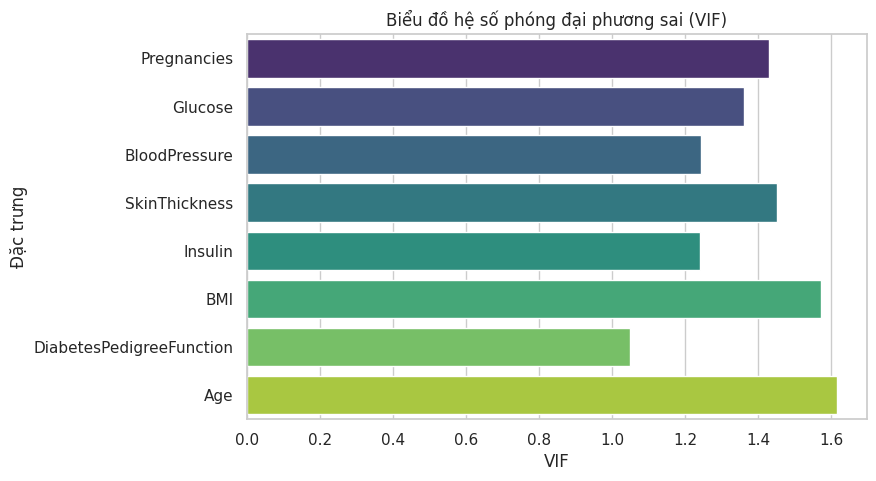

In [ ]:
# 1. Scale d·ªØ li·ªáu X (kh√¥ng g·ªìm Outcome)
X = df_median.drop("Outcome", axis=1)
X_scaled = StandardScaler().fit_transform(X)

# 2. T√≠nh VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# 3. G·∫Øn c·ªù ƒë√°nh gi√°
def check_vif(vif):
    if vif < 5:
        return "T·ªët"
    elif vif < 10:
        return "C·∫ßn xem x√©t"
    else:
        return "ƒêa c·ªông tuy·∫øn m·∫°nh"

vif_data["ƒê√°nh gi√°"] = vif_data["VIF"].apply(check_vif)

# 4. Hi·ªÉn th·ªã
display(vif_data.sort_values(by="VIF", ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(x="VIF", y="Feature", data=vif_data, hue="Feature", palette="viridis", legend=False, dodge=False)
plt.title("Bi·ªÉu ƒë·ªì h·ªá s·ªë ph√≥ng ƒë·∫°i ph∆∞∆°ng sai (VIF)")
plt.xlabel("VIF")
plt.ylabel("ƒê·∫∑c tr∆∞ng")
plt.show()


# 6. PH√ÇN T√çCH N√ÇNG CAO

## 6.1 PH√ÇN T√çCH PH√ÇN NH√ìM (PH√ÇN C·ª§M)

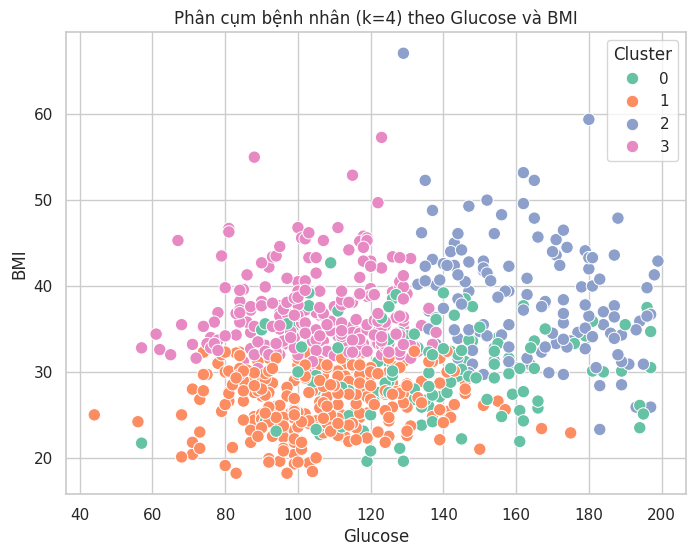

C·ª•m 1.0:
  -- Tu·ªïi: 53.5 ¬± 8.4
  -- BMI: 30.4 ¬± 4.8
  -- Glucose: 137.0 ¬± 27.4
  -- T·ª∑ l·ªá m·∫Øc b·ªánh: 49.2%
  -- S·ªë l∆∞·ª£ng: 128 b·ªánh nh√¢n (16.7%)

C·ª•m 2.0:
  -- Tu·ªïi: 26.1 ¬± 5.2
  -- BMI: 26.5 ¬± 3.4
  -- Glucose: 106.3 ¬± 20.3
  -- T·ª∑ l·ªá m·∫Øc b·ªánh: 11.6%
  -- S·ªë l∆∞·ª£ng: 268 b·ªánh nh√¢n (34.9%)

C·ª•m 3.0:
  -- Tu·ªïi: 32.7 ¬± 7.8
  -- BMI: 38.4 ¬± 6.6
  -- Glucose: 163.6 ¬± 18.5
  -- T·ª∑ l·ªá m·∫Øc b·ªánh: 72.3%
  -- S·ªë l∆∞·ª£ng: 137 b·ªánh nh√¢n (17.8%)

C·ª•m 4.0:
  -- Tu·ªïi: 30.7 ¬± 7.6
  -- BMI: 36.8 ¬± 4.5
  -- Glucose: 106.3 ¬± 17.3
  -- T·ª∑ l·ªá m·∫Øc b·ªánh: 31.9%
  -- S·ªë l∆∞·ª£ng: 235 b·ªánh nh√¢n (30.6%)



In [ ]:
# 1. Ch·ªçn ƒë·∫∑c tr∆∞ng ƒë·ªÉ ph√¢n c·ª•m
X = df_median[["Age", "BMI", "Glucose"]]

# 2. Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Ph√¢n c·ª•m KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_median["Cluster"] = kmeans.fit_predict(X_scaled)

# 4. Scatter plot tr·ª±c quan
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_median["Glucose"], y=df_median["BMI"], hue=df_median["Cluster"], palette="Set2", s=80)
plt.title("Ph√¢n c·ª•m b·ªánh nh√¢n (k=4) theo Glucose v√† BMI")
plt.show()

# 5. T√≠nh th·ªëng k√™ t·ª´ng c·ª•m
summary = df_median.groupby("Cluster").agg({
    "Age": ["mean", "std"],
    "BMI": ["mean", "std"],
    "Glucose": ["mean", "std"],
    "Outcome": "mean"
})
summary.columns = ["Age_mean", "Age_std", "BMI_mean", "BMI_std", "Glucose_mean", "Glucose_std", "Disease_rate"]
summary = summary.reset_index()

# 6. Th√™m s·ªë l∆∞·ª£ng v√† ph·∫ßn trƒÉm b·ªánh nh√¢n
cluster_counts = df_median["Cluster"].value_counts().sort_index()
summary["n"] = cluster_counts.values
summary["percent"] = (cluster_counts.values / len(df_median) * 100).round(1)

# 7. In ra th√¥ng tin t·ª´ng c·ª•m
for i, row in summary.iterrows():
    print(f"C·ª•m {row['Cluster']+1}:")
    print(f"  -- Tu·ªïi: {row['Age_mean']:.1f} ¬± {row['Age_std']:.1f}")
    print(f"  -- BMI: {row['BMI_mean']:.1f} ¬± {row['BMI_std']:.1f}")
    print(f"  -- Glucose: {row['Glucose_mean']:.1f} ¬± {row['Glucose_std']:.1f}")
    print(f"  -- T·ª∑ l·ªá m·∫Øc b·ªánh: {row['Disease_rate']*100:.1f}%")
    print(f"  -- S·ªë l∆∞·ª£ng: {int(row['n'])} b·ªánh nh√¢n ({row['percent']}%)\n")


### 6.1.2 ƒê·∫∑c ƒëi·ªÉm c·ªßa t·ª´ng c·ª•m

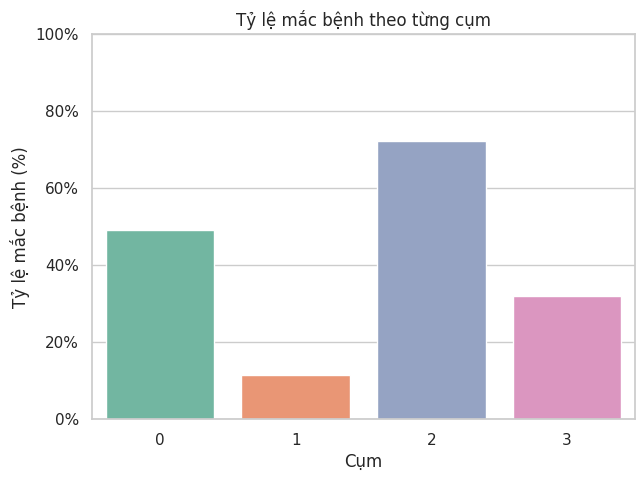

In [ ]:
# Bi·ªÉu ƒë·ªì t·ª∑ l·ªá m·∫Øc b·ªánh theo c·ª•m
plt.figure(figsize=(7,5))
sns.barplot(x="Cluster", y="Disease_rate", data=summary, hue="Cluster", palette="Set2", dodge=False, legend=False)
plt.ylabel("T·ª∑ l·ªá m·∫Øc b·ªánh (%)")
plt.xlabel("C·ª•m")
plt.title("T·ª∑ l·ªá m·∫Øc b·ªánh theo t·ª´ng c·ª•m")
plt.ylim(0, 1)  # v√¨ t·ª∑ l·ªá ƒëang trong kho·∫£ng [0,1]
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y*100:.0f}%"))
plt.show()


## 6.2 PH√ÇN T√çCH Y·∫æU T·ªê NGUY C∆†

### 6.2.1 X·∫øp h·∫°ng c√°c y·∫øu t·ªë nguy c∆°

In [ ]:
import statsmodels.api as sm
# 1. Ch·ªçn bi·∫øn ƒë·ªôc l·∫≠p v√† bi·∫øn ph·ª• thu·ªôc
X = df_median.drop("Outcome", axis=1)   # t·∫•t c·∫£ ƒë·∫∑c tr∆∞ng
y = df_median["Outcome"]

# 2. Th√™m h·∫±ng s·ªë v√†o X
X_const = sm.add_constant(X)

# 3. H·ªìi quy logistic
model = sm.Logit(y, X_const).fit()

# 4. L·∫•y h·ªá s·ªë h·ªìi quy
params = model.params
conf = model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']

# 5. T√≠nh Odds Ratio v√† CI
or_table = np.exp(conf)
or_table = or_table.reset_index().rename(columns={'index': 'Y·∫øu t·ªë'})

print(model.summary())
display(or_table)


Optimization terminated successfully.
         Current function value: 0.461994
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      758
Method:                           MLE   Df Model:                            9
Date:                Tue, 23 Sep 2025   Pseudo R-squ.:                  0.2857
Time:                        07:49:15   Log-Likelihood:                -354.81
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 6.880e-56
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.4262      0.845    -11.154      0.000     -11.083

Y·∫øu t·ªë      2.5%     97.5%        OR
0                     const  0.000015  0.000422  0.000081
1               Pregnancies  1.054938  1.198818  1.124579
2                   Glucose  1.031930  1.048362  1.040113
3             BloodPressure  0.975552  1.009158  0.992213
4             SkinThickness  0.975806  1.027390  1.001266
5                   Insulin  0.996690  1.001118  0.998902
6                       BMI  1.037041  1.123060  1.079194
7  DiabetesPedigreeFunction  1.374515  4.427215  2.466834
8                       Age  1.001181  1.045001  1.022856
9                   Cluster  0.980773  1.557503  1.235944

In [ ]:


# ---- 1. ƒê·∫∑t ng∆∞·ª°ng cut-off cho t·ª´ng bi·∫øn ----
cutoffs = {
    "Glucose": 126,
    "BMI": 35,
    "Age": 45,
    "Pregnancies": 4,
    "DiabetesPedigreeFunction": 0.5,
    "BloodPressure": 90,
    "Insulin": 166,
    "SkinThickness": 30
}

# ---- 2. T·∫°o bi·∫øn nh·ªã ph√¢n 0/1 ----
df_bin = df.copy()
for var, threshold in cutoffs.items():
    df_bin[f"{var}_high"] = (df_bin[var] >= threshold).astype(int)

# ---- 3. H√†m t√≠nh OR, CI, p-value ----
def odds_ratio_logit(data, var, outcome="Outcome"):
    model = sm.Logit(data[outcome], sm.add_constant(data[var])).fit(disp=0)
    OR = np.exp(model.params.iloc[1])   # d√πng iloc
    CI = np.exp(model.conf_int().loc[var])
    pval = model.pvalues.iloc[1]        # d√πng iloc
    return OR, CI[0], CI[1], pval


# ---- 4. Ch·∫°y cho t·ª´ng bi·∫øn ----
results = []
for var in cutoffs.keys():
    binary_var = f"{var}_high"
    OR, low, high, pval = odds_ratio_logit(df_bin, binary_var)
    # ---- 5. Ph√¢n lo·∫°i nguy c∆° ----
    if pval >= 0.05:
        category = "Kh√¥ng c√≥ √Ω nghƒ©a"
    elif OR >= 5:
        category = "R·∫•t cao"
    elif OR >= 3:
        category = "Cao"
    elif OR >= 2:
        category = "V·ª´a"
    elif OR >= 1:
        category = "Th·∫•p"
    else:
        category = "B·∫£o v·ªá"
    results.append([var, cutoffs[var], round(OR, 2), f"({low:.2f}-{high:.2f})", round(pval, 3), category])

# ---- 6. Xu·∫•t b·∫£ng k·∫øt qu·∫£ ----
or_df = pd.DataFrame(results, columns=["Y·∫øu t·ªë nguy c∆°", "Ng∆∞·ª°ng >=", "OR", "95% CI", "P-value", "Ph√¢n lo·∫°i"])
display(or_df)


Y·∫øu t·ªë nguy c∆°  Ng∆∞·ª°ng >=    OR       95% CI  P-value Ph√¢n lo·∫°i
0                   Glucose      126.0  5.99  (4.33-8.29)    0.000   R·∫•t cao
1                       BMI       35.0  2.24  (1.64-3.06)    0.000       V·ª´a
2                       Age       45.0  2.11  (1.45-3.08)    0.000       V·ª´a
3               Pregnancies        4.0  2.26  (1.67-3.05)    0.000       V·ª´a
4  DiabetesPedigreeFunction        0.5  2.05  (1.51-2.79)    0.000       V·ª´a
5             BloodPressure       90.0  1.84  (1.08-3.12)    0.025      Th·∫•p
6                   Insulin      166.0  2.36  (1.62-3.45)    0.000       V·ª´a
7             SkinThickness       30.0  1.84  (1.35-2.51)    0.000      Th·∫•p

### 6.2.2 T·∫°o h·ªá th·ªëng ch·∫•m ƒëi·ªÉm nguy c∆°

In [ ]:
# 1. H√†m g√°n ƒëi·ªÉm cho t·ª´ng y·∫øu t·ªë nguy c∆°
def calc_risk_score(row):
    score = 0

    # Glucose
    if 100 <= row["Glucose"] < 126:
        score += 1
    elif row["Glucose"] >= 126:
        score += 4

    # BMI
    if 25 <= row["BMI"] < 30:
        score += 1
    elif 30 <= row["BMI"] < 35:
        score += 2
    elif row["BMI"] >= 35:
        score += 3

    # Tu·ªïi
    if 25 <= row["Age"] < 35:
        score += 1
    elif 35 <= row["Age"] < 45:
        score += 2
    elif row["Age"] >= 45:
        score += 3

    # S·ªë l·∫ßn mang thai
    if 1 <= row["Pregnancies"] <= 3:
        score += 1
    elif row["Pregnancies"] >= 4:
        score += 2

    # Y·∫øu t·ªë di truy·ªÅn (DPF)
    if row["DiabetesPedigreeFunction"] >= 0.5:
        score += 1

    # Huy·∫øt √°p
    if row["BloodPressure"] >= 90:
        score += 2

    return score

# 2. √Åp d·ª•ng v√†o dataset
df["RiskScore"] = df.apply(calc_risk_score, axis=1)

# 3. Ph√¢n lo·∫°i nguy c∆°
def classify(score):
    if score <= 3:
        return "Nguy c∆° th·∫•p (0-3)"
    elif score <= 6:
        return "Nguy c∆° v·ª´a (4-6)"
    elif score <= 9:
        return "Nguy c∆° cao (7-9)"
    else:
        return "Nguy c∆° r·∫•t cao (‚â•10)"

df["RiskLevel"] = df["RiskScore"].apply(classify)

# 4. Th·ªëng k√™ t·ªâ l·ªá m·∫Øc b·ªánh trong t·ª´ng nh√≥m nguy c∆°
summary = df.groupby("RiskLevel")["Outcome"].agg(["mean", "count"])
summary["mean"] = (summary["mean"] * 100).round(1)  # % m·∫Øc b·ªánh
summary.rename(columns={"mean": "T·ªâ l·ªá m·∫Øc b·ªánh(%)", "count": "S·ªë b·ªánh nh√¢n"}, inplace=True)

display(summary)


T·ªâ l·ªá m·∫Øc b·ªánh(%)  S·ªë b·ªánh nh√¢n
RiskLevel                                             
Nguy c∆° cao (7-9)                   47.3           222
Nguy c∆° r·∫•t cao (‚â•10)               67.6           170
Nguy c∆° th·∫•p (0-3)                   3.1           130
Nguy c∆° v·ª´a (4-6)                   17.9           246

### 6.2.3 Ph√¢n t√≠ch ng∆∞·ª°ng cho s√†ng l·ªçc

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def roc_analysis(X, y, feature):
    # 1. AUC
    auc = roc_auc_score(y, X[feature])

    # 2. ROC curve
    fpr, tpr, thresholds = roc_curve(y, X[feature])

    # 3. T√¨m ng∆∞·ª°ng t·ªëi ∆∞u (Youden‚Äôs J)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    sens = tpr[ix]
    spec = 1 - fpr[ix]

    return best_thresh, auc, sens, spec

# 4. C√°c bi·∫øn c·∫ßn ph√¢n t√≠ch
features = ["Glucose", "BMI", "Age", "RiskScore"]
results = []

for f in features:
    temp = df[[f, "Outcome"]].dropna()
    best_thresh, auc, sens, spec = roc_analysis(temp, temp["Outcome"], f)
    results.append({
        "Bi·∫øn": f,
        "Ng∆∞·ª°ng t·ªëi ∆∞u": round(best_thresh,1),
        "AUC": round(auc,2),
        "ƒê·ªô nh·∫°y": f"{sens*100:.1f}%",
        "ƒê·ªô ƒë·∫∑c hi·ªáu": f"{spec*100:.1f}%"
    })


roc_df = pd.DataFrame(results)
display(roc_df)


Bi·∫øn  Ng∆∞·ª°ng t·ªëi ∆∞u   AUC ƒê·ªô nh·∫°y ƒê·ªô ƒë·∫∑c hi·ªáu
0    Glucose          124.0  0.79   70.7%       73.0%
1        BMI           29.9  0.69   83.1%       47.9%
2        Age           29.0  0.69   73.5%       59.2%
3  RiskScore            7.0  0.80   82.1%       65.6%

## 6.3 SO S√ÅNH V·ªöI TI√äU CHU·∫®N CH·∫®N ƒêO√ÅN

### 6.3.2 ƒê·ªô ch√≠nh x√°c c·ªßa c√°c gi√° tr·ªã c·∫Øt

In [ ]:


# 2. H√†m t√≠nh ƒë·ªô nh·∫°y, ƒë·ªô ƒë·∫∑c hi·ªáu, PPV, NPV
def performance_metrics(df, threshold, column='Glucose', outcome='Outcome'):
    pred = (df[column] >= threshold).astype(int)
    true = df[outcome]

    TP = ((pred==1) & (true==1)).sum()
    TN = ((pred==0) & (true==0)).sum()
    FP = ((pred==1) & (true==0)).sum()
    FN = ((pred==0) & (true==1)).sum()

    sensitivity = TP / (TP + FN) if (TP+FN)>0 else 0
    specificity = TN / (TN + FP) if (TN+FP)>0 else 0
    PPV = TP / (TP + FP) if (TP+FP)>0 else 0
    NPV = TN / (TN + FN) if (TN+FN)>0 else 0

    return sensitivity, specificity, PPV, NPV

# 3. Ng∆∞·ª°ng Glucose c·∫ßn ƒë√°nh gi√°
thresholds = [100, 110, 120, 130, 140, 150, 160]

# 4. T√≠nh cho t·∫•t c·∫£ ng∆∞·ª°ng
results = []
for th in thresholds:
    sens, spec, ppv, npv = performance_metrics(df, th, 'Glucose', 'Outcome')
    results.append([th, sens*100, spec*100, ppv*100, npv*100])

df_perf = pd.DataFrame(results, columns=['Threshold (mg/dL)',
                                         'Sensitivity (%)',
                                         'Specificity (%)',
                                         'PPV (%)',
                                         'NPV (%)'])

# 5. T√≠nh Youden index ƒë·ªÉ t√¨m ng∆∞·ª°ng t·ªëi ∆∞u
df_perf['Youden_index'] = df_perf['Sensitivity (%)']/100 + df_perf['Specificity (%)']/100 - 1
optimal = df_perf.loc[df_perf['Youden_index'].idxmax()]

# 6. In b·∫£ng k·∫øt qu·∫£
print("B·∫£ng ƒë·ªô ch√≠nh x√°c c·ªßa c√°c ng∆∞·ª°ng Glucose:")
print(df_perf)
print("\nNg∆∞·ª°ng t·ªëi ∆∞u c√¢n b·∫±ng ƒë·ªô nh·∫°y v√† ƒë·ªô ƒë·∫∑c hi·ªáu:")
print(optimal)


B·∫£ng ƒë·ªô ch√≠nh x√°c c·ªßa c√°c ng∆∞·ª°ng Glucose:
   Threshold (mg/dL)  Sensitivity (%)  Specificity (%)    PPV (%)    NPV (%)  \
0                100        94.029851             36.2  44.133100  91.878173   
1                110        83.582090             54.0  49.339207  85.987261   
2                120        73.880597             67.6  55.000000  82.843137   
3                130        60.447761             80.8  62.790698  79.215686   
4                140        50.373134             87.6  68.527919  76.707531   
5                150        39.552239             92.6  74.125874  74.080000   
6                160        31.343284             96.4  82.352941  72.372372   

   Youden_index  
0      0.302299  
1      0.375821  
2      0.414806  
3      0.412478  
4      0.379731  
5      0.321522  
6      0.277433  

Ng∆∞·ª°ng t·ªëi ∆∞u c√¢n b·∫±ng ƒë·ªô nh·∫°y v√† ƒë·ªô ƒë·∫∑c hi·ªáu:
Threshold (mg/dL)    120.000000
Sensitivity (%)       73.880597
Specificity (%)       67.

Sensitivity (%) ‚Üí % b·ªánh nh√¢n th·∫≠t s·ª± m·∫Øc b·ªánh ƒë∆∞·ª£c ph√°t hi·ªán.


Specificity (%) ‚Üí % b·ªánh nh√¢n kh√¥ng m·∫Øc b·ªánh ƒë∆∞·ª£c lo·∫°i ƒë√∫ng.


PPV (%) ‚Üí x√°c su·∫•t d∆∞∆°ng t√≠nh ƒë√∫ng khi x√©t nghi·ªám ‚â• ng∆∞·ª°ng.


NPV (%) ‚Üí x√°c su·∫•t √¢m t√≠nh ƒë√∫ng khi x√©t nghi·ªám < ng∆∞·ª°ng.


Youden_index = Sensitivity + Specificity - 1 ‚Üí t√¨m ng∆∞·ª°ng t·ªëi ∆∞u c√¢n b·∫±ng ƒë·ªô nh·∫°y v√† ƒë·ªô ƒë·∫∑c hi·ªáu.